Re-run the EFA with reduced items

In [1]:
import warnings

import numpy as np
import pandas as pd

import scaledev
from scaledev import modeler, preprocessor, vizer

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [2]:
data_loc = scaledev.get_data_dir()

# Show full dataframes when printing
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
np.set_printoptions(threshold=100, suppress=True)

# load raw data
df_raw = pd.read_excel(data_loc / "ets_data.xlsx")
df_raw.head()

df_raw = preprocessor.clean_columns(df_raw)

In [3]:
# Items from the first reduced set in the spreadsheet
reduced_items = [
    "cx9",
    "sp4",
    "ae3",
    "sp5",
    "cx10",
    "em1",
    "ex8",
    "ae6",
    "to1",
    "c5",
    "c6",
    "cx11",
    "cx6",
    "c9",
    "to2",
    "sp2",
    "t2",
    "c10",
    "se2",
    "ex6",
    "cx12",
    "ex2",
    "em4",
    "em9",
    "em7",
    "em6",
]

df_reduced_1 = df_raw[reduced_items]

Low loadings: 
['se2', 'cx12']


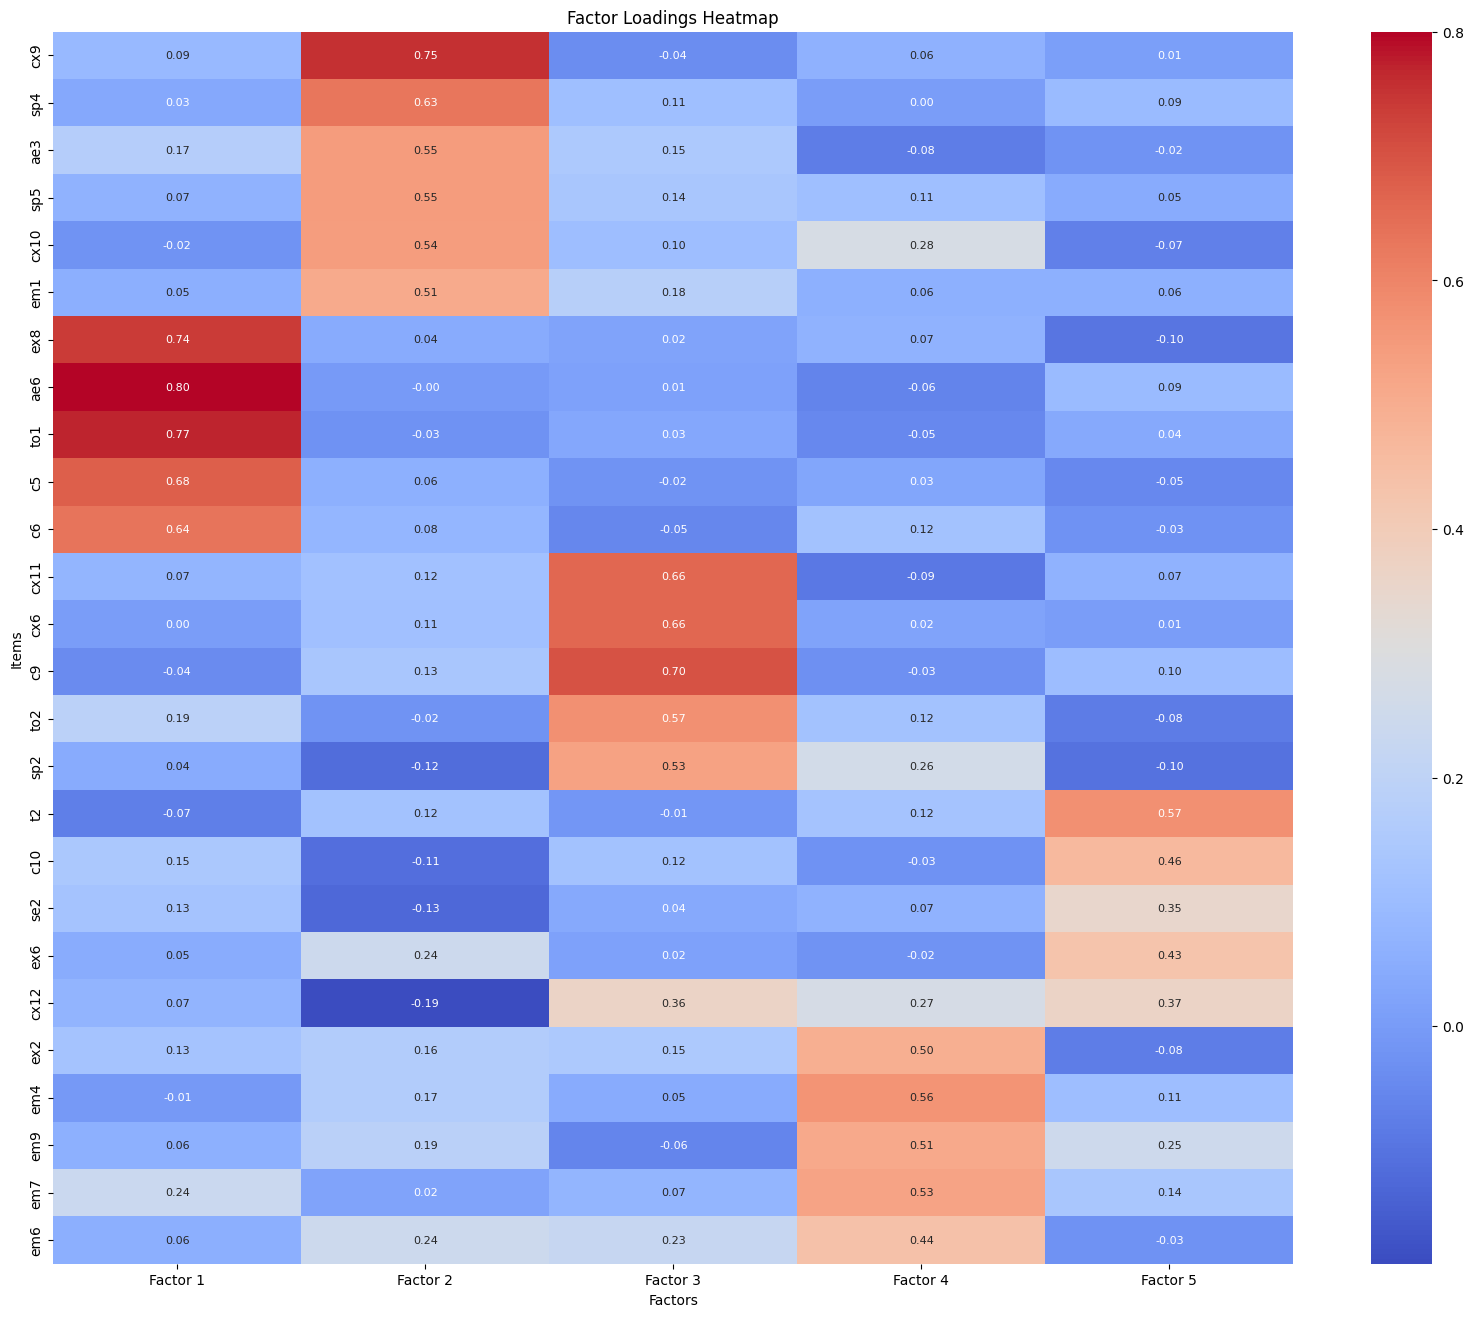

In [4]:
# Run the EFA
efa_5_reduced_v1 = modeler.efa(df=df_reduced_1, n_factors=5)
efa_5_reduced_v1_low_loadings = modeler.get_items_with_low_loadings(
    efa_5_reduced_v1.loadings_, df_reduced_1.columns, threshold=0.4
)
print("Low loadings: ")
print(efa_5_reduced_v1_low_loadings)

# heatmap
vizer.plot_loadings_heatmap(
    loadings=efa_5_reduced_v1.loadings_,
    item_names=df_reduced_1.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_5_reduced_v1.n_factors)],
)

In [5]:
# Show the full question and what factor it loads on
df_strongest_loadings = modeler.strongest_loadings(
    efa_5_reduced_v1.loadings_, df_reduced_1.columns
)

# add in the question text
df_question_txt = pd.read_excel(data_loc / "ets_question_text_map.xlsx")
df_strongest_loadings = pd.merge(
    df_strongest_loadings, df_question_txt, on="item", how="left"
)
df_strongest_loadings

,item,strongest_factor,loading,item_text
0,ae6,1,0.80008,I feel overwhelming compassion for others.
1,to1,1,0.77077,Compassion for others is a priority.
2,ex8,1,0.73935,My heart opens to include others.
3,c5,1,0.67830,My thoughts easily move to how I can help others.
4,c6,1,0.63663,My thinking expands to include other people.
5,cx9,2,0.75398,I feel a sense of belonging.
6,sp4,2,0.62989,I feel a profound sense of belonging.
7,ae3,2,0.54792,I have the feeling of being cared for.
8,sp5,2,0.54747,I feel a profound sense of joy.
9,cx10,2,0.54294,I feel fully aligned with life.


se10 and cx12 have low-ish loadings, but using a threshold of 0.3 for keeping items isn't unreasonable. I was using 0.4 previously when our goal was to reduce the number of items and we still had a lot. 

I think cx12 equally loading on 2 factors is more of an issue, but if we have a good reason for it, it could be left. Let's see what things look like with the other item list provided. 

In [6]:
reduced_items_2 = [
    "cx9",
    "sp4",
    "ae3",
    "sp5",
    "cx10",
    "em1",
    "ex8",
    "ae6",
    "to1",
    "c5",
    "c6",
    "cx11",
    "cx6",
    "c9",
    "to2",
    "sp2",
    "t2",
    "c10",
    "se2",
    "cx12",
    "c11",
    "em4",
    "em9",
    "em7",
    "to7",
    "ex2",
]

df_reduced_2 = df_raw[reduced_items_2]

Low loadings: 
['em9', 'to7', 'ex2']


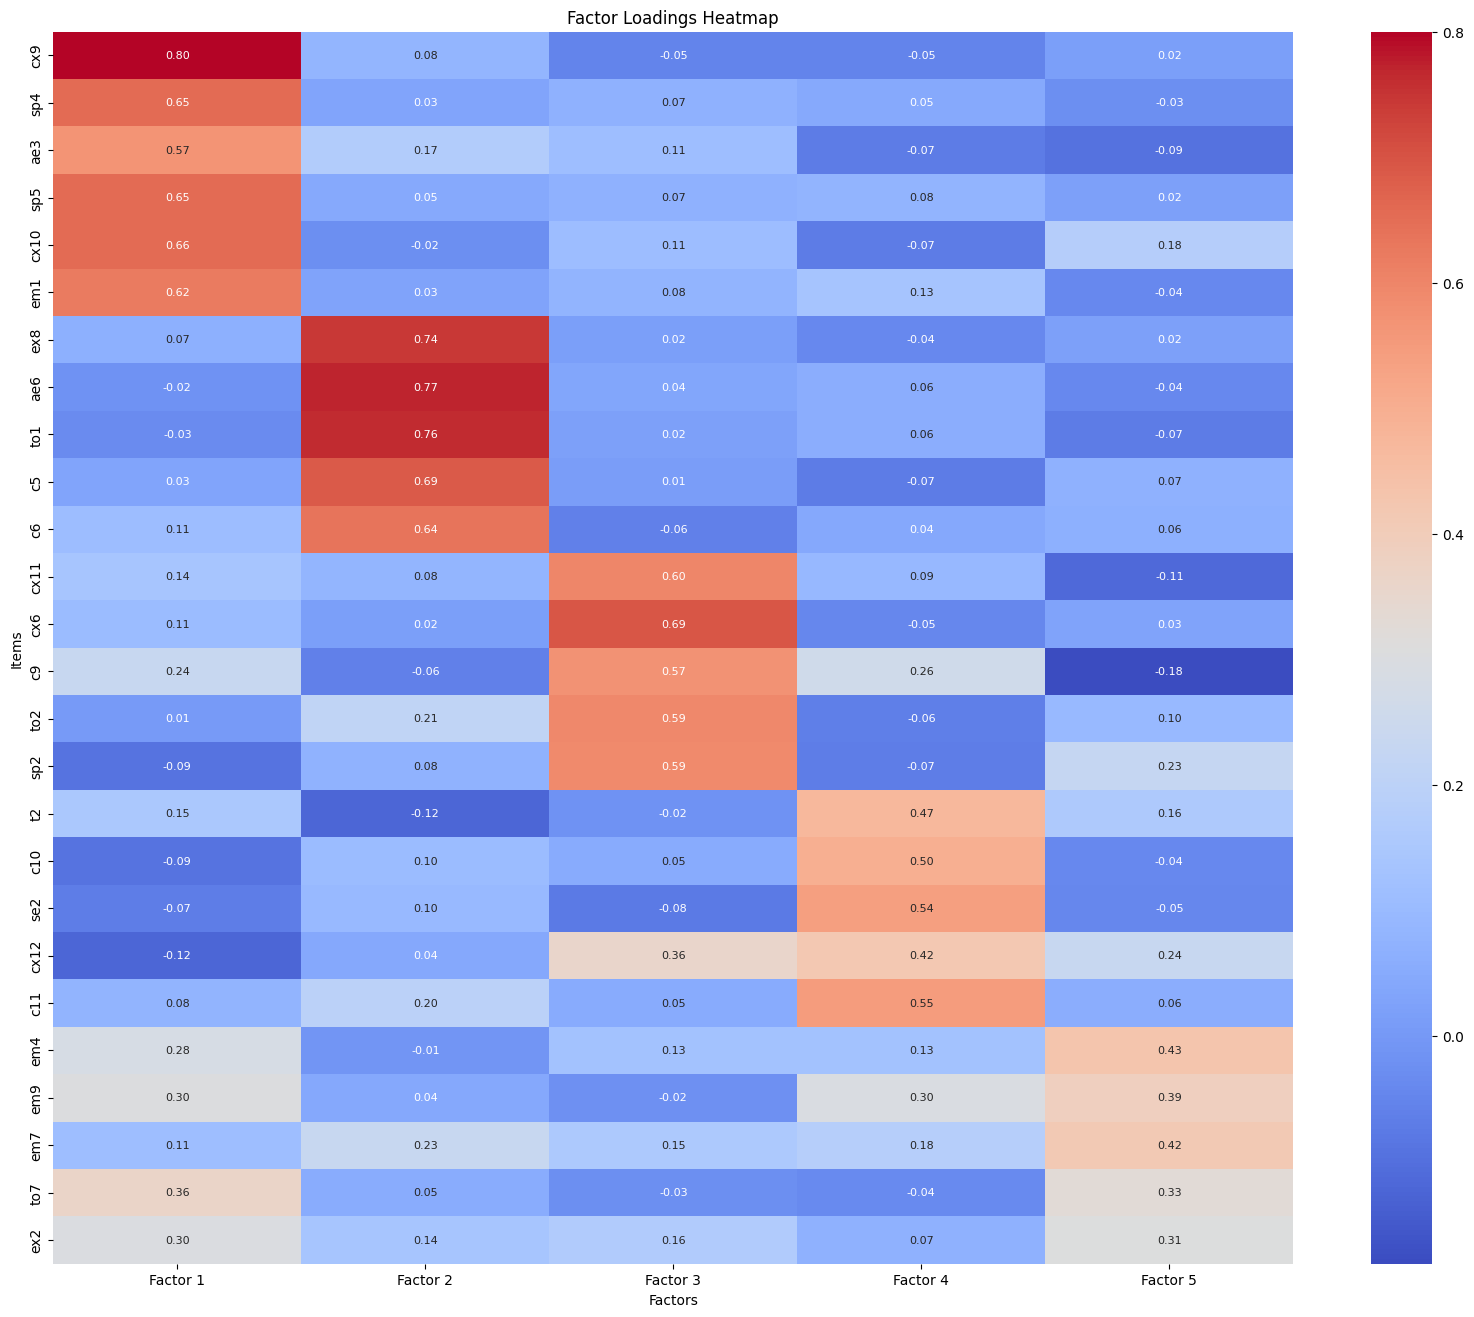

In [7]:
# Run the EFA
efa_5_reduced_v2 = modeler.efa(df=df_reduced_2, n_factors=5)
efa_5_reduced_v2_low_loadings = modeler.get_items_with_low_loadings(
    efa_5_reduced_v2.loadings_, df_reduced_2.columns, threshold=0.4
)
print("Low loadings: ")
print(efa_5_reduced_v2_low_loadings)

# heatmap
vizer.plot_loadings_heatmap(
    loadings=efa_5_reduced_v2.loadings_,
    item_names=df_reduced_2.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_5_reduced_v2.n_factors)],
)

In [8]:
# Show the full question and what factor it loads on
df_strongest_loadings = modeler.strongest_loadings(
    efa_5_reduced_v2.loadings_, df_reduced_2.columns
)

# add in the question text
df_question_txt = pd.read_excel(data_loc / "ets_question_text_map.xlsx")
df_strongest_loadings = pd.merge(
    df_strongest_loadings, df_question_txt, on="item", how="left"
)
df_strongest_loadings

,item,strongest_factor,loading,item_text
0,cx9,1,0.80014,I feel a sense of belonging.
1,cx10,1,0.65675,I feel fully aligned with life.
2,sp5,1,0.65461,I feel a profound sense of joy.
3,sp4,1,0.65452,I feel a profound sense of belonging.
4,em1,1,0.62237,I experience a calm feeling in my heart.
5,ae3,1,0.56778,I have the feeling of being cared for.
6,to7,1,0.36340,I embrace and face my fears.
7,ae6,2,0.77115,I feel overwhelming compassion for others.
8,to1,2,0.76366,Compassion for others is a priority.
9,ex8,2,0.74464,My heart opens to include others.


We have 3 items with low loadings here. In general I think factor 5 is looking pretty weak with this solution. No item loads strongly, and multiple items load about equally on more than one factor. 

Some more details on how this EFA is ran, so that you can compare to SPSS. The options with the specific package I'm using are:

- Model fitting method:
    - maximum likelihood - This is what I used
    - minres
    - principal factor extraction (this uses PCA, which isn't preferred here)

I used maximum likelihood for a few reasons. First, that's the standard fitting method for confirmatory factor analysis, so using it here can make the transition to CFA easier. You can do things like statistical tests for significance on loadings if desired, and there are more ways to assess how well the model fits the data. It generally seems to be the more widely used method if eventually moving to CFA. 

The downside is that there are some normality assumptions. However, it's supposed to be pretty robust to violations as long as you have a good sample size (>200). I added some output to look at normality. You can see that not all items are normally distributed, but the data isn't bad. We could try re-doing the analysis with minres (I can re-run the full file pretty quickly with that change). We will just need to keep in mind that we will have to use a fit method in our CFA that also reflects non-normality. 

- Rotation method:
    - oblimin (oblique rotation)
    - promax (oblique rotation)
    - quartimin (oblique rotation)
    - varimax (orthogonal rotation)
    - oblimax (orthogonal rotation)
    - quartimax (orthogonal rotation)
    - equamax (orthogonal rotation)

I used oblimin as it generally gives more accurate representations of correlated features. From my reading, promax is preferred with very large datasets because it is faster, with oblimin being more common. Promax tries to force items to be either higher or lower loading on items, which can help with interoperability, but also tends to over simplify factor structures. I can try running that too if wanted though. 

*** Normality Checks for: cx9 ***

Descriptive Statistics:
count   405.00000
mean      3.67160
std       1.29863
min       1.00000
25%       3.00000
50%       4.00000
75%       4.00000
max       6.00000
Name: cx9, dtype: float64
Skewness: 0.14376444946644626
Kurtosis: -0.6041079743572371
Kolmogorov-Smirnov Test: Statistic=0.16908393481514444, p-value=1.3653341632146573e-10


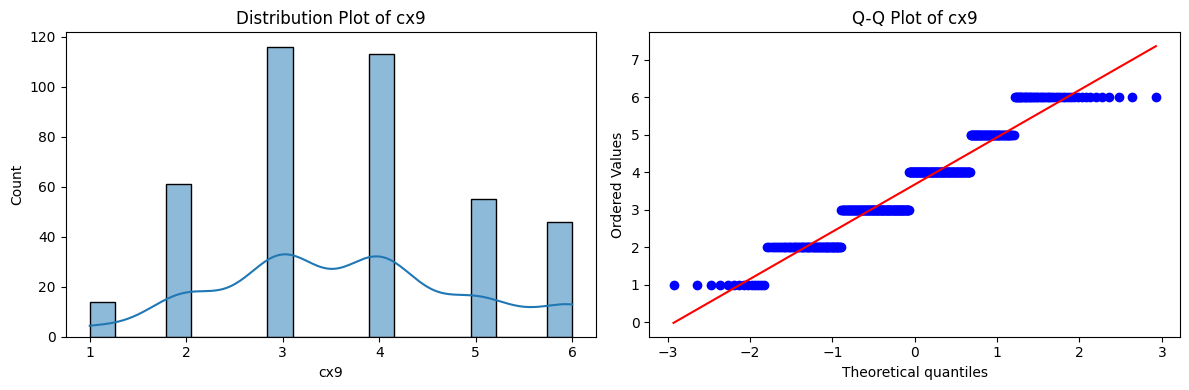

---------------------------------------- 

*** Normality Checks for: sp4 ***

Descriptive Statistics:
count   405.00000
mean      3.60741
std       1.20290
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: sp4, dtype: float64
Skewness: 0.20866878239825415
Kurtosis: -0.5865218281261866
Kolmogorov-Smirnov Test: Statistic=0.21172204709255604, p-value=2.079221498451929e-16


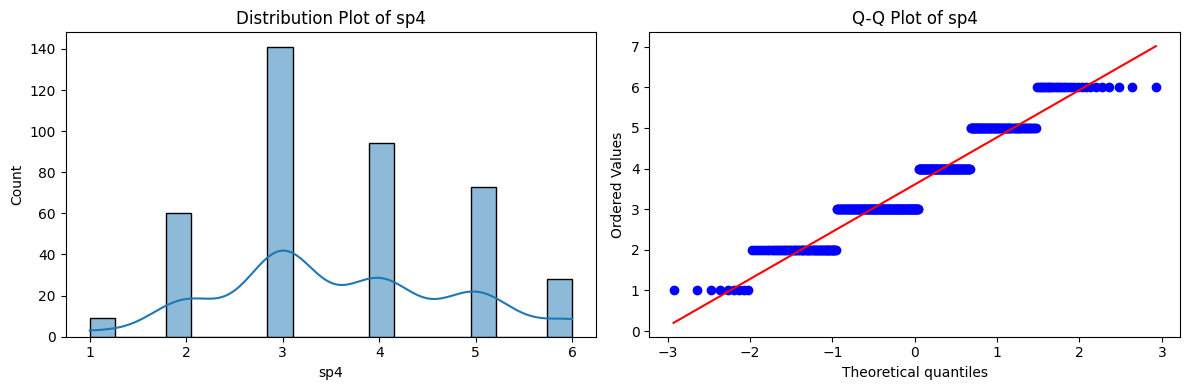

---------------------------------------- 

*** Normality Checks for: ae3 ***

Descriptive Statistics:
count   405.00000
mean      3.80000
std       1.36142
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: ae3, dtype: float64
Skewness: 0.1355681812539927
Kurtosis: -0.8908986311103093
Kolmogorov-Smirnov Test: Statistic=0.19568091949635885, p-value=4.616158608752686e-14


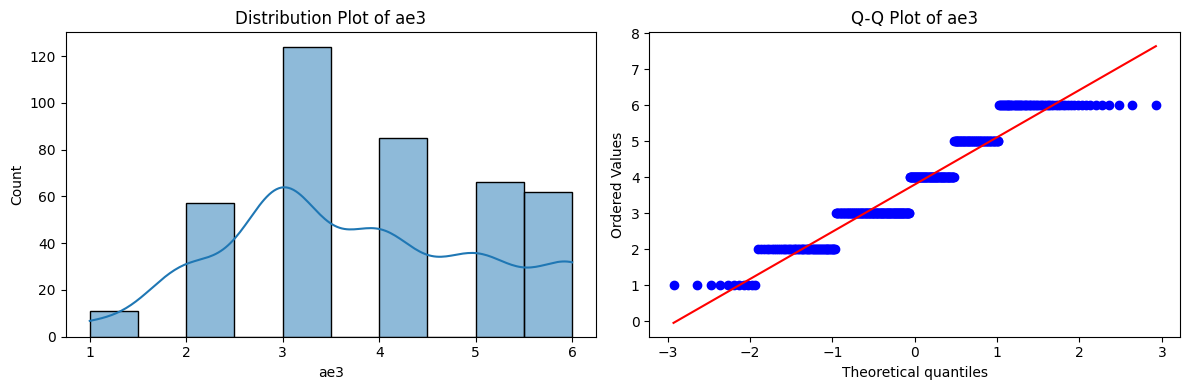

---------------------------------------- 

*** Normality Checks for: sp5 ***

Descriptive Statistics:
count   405.00000
mean      3.63457
std       1.22264
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: sp5, dtype: float64
Skewness: 0.2284326509208613
Kurtosis: -0.4677702436021991
Kolmogorov-Smirnov Test: Statistic=0.22158189436941295, p-value=6.029505198359089e-18


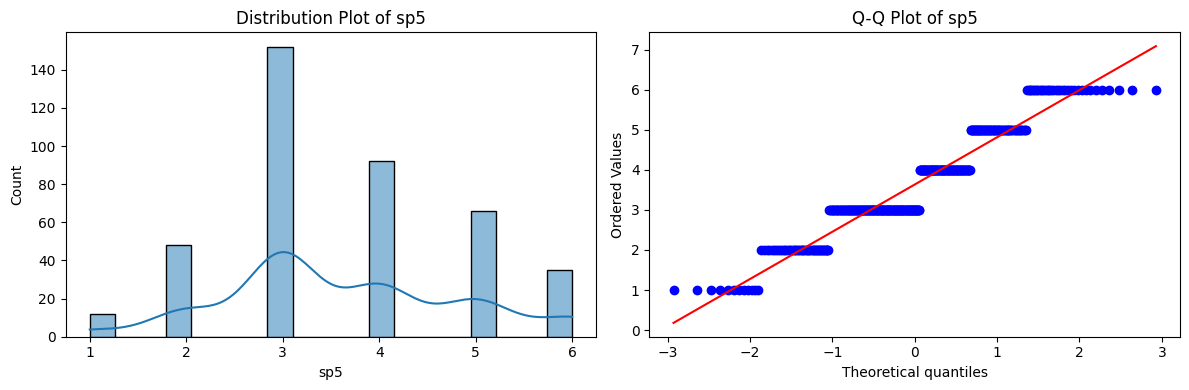

---------------------------------------- 

*** Normality Checks for: cx10 ***

Descriptive Statistics:
count   405.00000
mean      3.49630
std       1.25592
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: cx10, dtype: float64
Skewness: 0.317319156874712
Kurtosis: -0.37985443063193314
Kolmogorov-Smirnov Test: Statistic=0.22647901814818622, p-value=9.759433556160745e-19


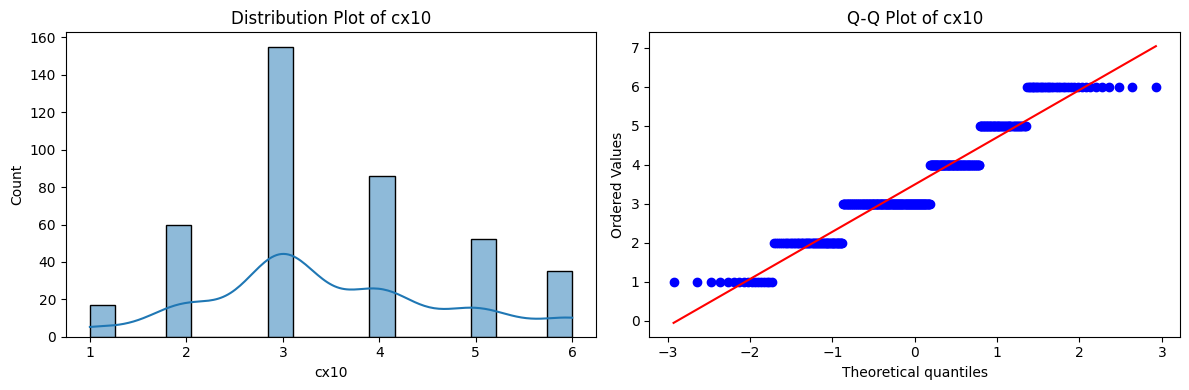

---------------------------------------- 

*** Normality Checks for: em1 ***

Descriptive Statistics:
count   405.00000
mean      3.72346
std       1.21768
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: em1, dtype: float64
Skewness: 0.08753683190192668
Kurtosis: -0.49580971497384185
Kolmogorov-Smirnov Test: Statistic=0.18304600802976162, p-value=2.388247530313895e-12


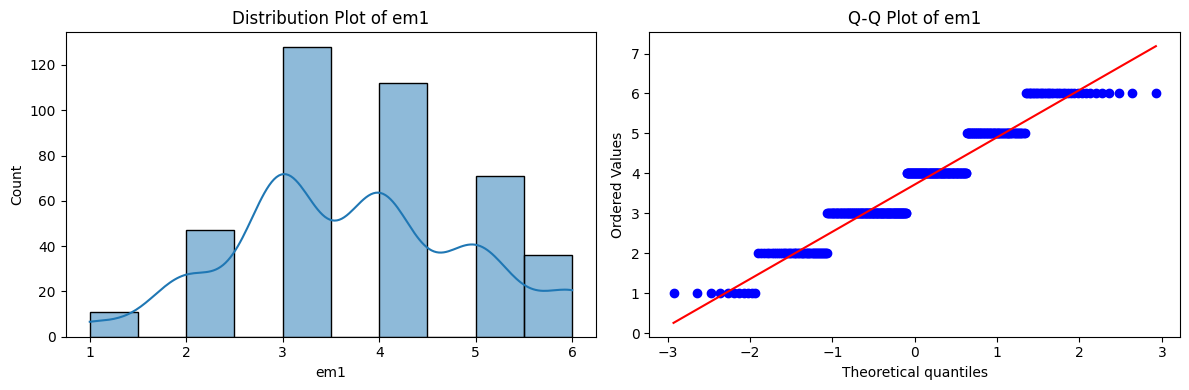

---------------------------------------- 

*** Normality Checks for: ex8 ***

Descriptive Statistics:
count   405.00000
mean      4.13086
std       1.21670
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: ex8, dtype: float64
Skewness: -0.14460356475608147
Kurtosis: -0.5894776368404258
Kolmogorov-Smirnov Test: Statistic=0.15755296750103098, p-value=3.0125555347245686e-09


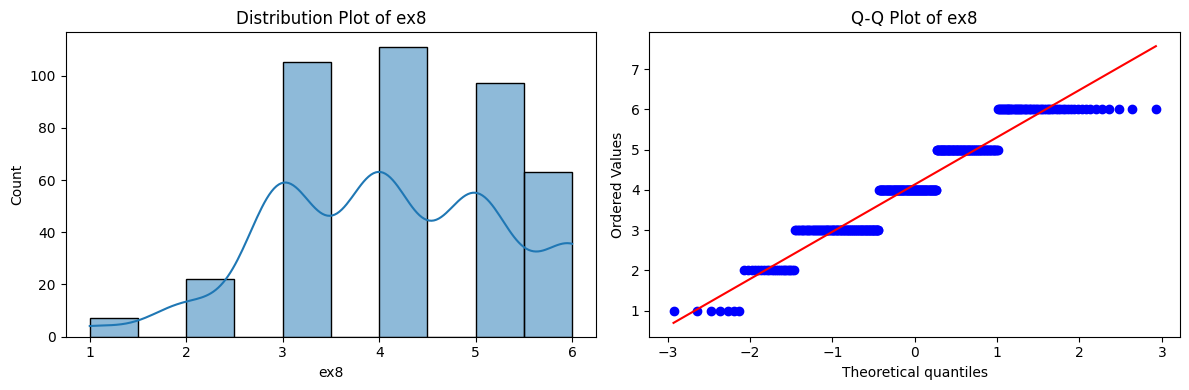

---------------------------------------- 

*** Normality Checks for: ae6 ***

Descriptive Statistics:
count   405.00000
mean      3.80247
std       1.22696
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: ae6, dtype: float64
Skewness: 0.16367201448164934
Kurtosis: -0.5071553107190017
Kolmogorov-Smirnov Test: Statistic=0.205181682798119, p-value=1.984785593619838e-15


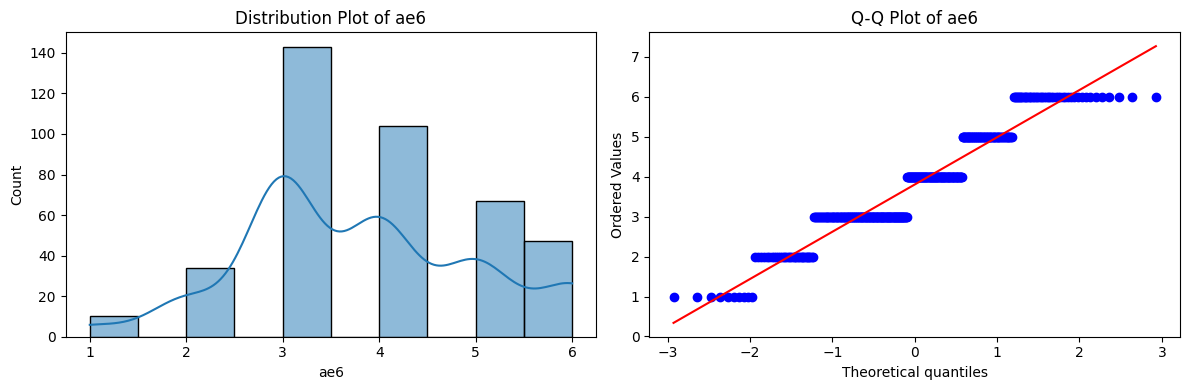

---------------------------------------- 

*** Normality Checks for: to1 ***

Descriptive Statistics:
count   405.00000
mean      4.16049
std       1.25919
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: to1, dtype: float64
Skewness: -0.12595816149482705
Kurtosis: -0.7513379822800093
Kolmogorov-Smirnov Test: Statistic=0.1525002549185494, p-value=1.0894908456248429e-08


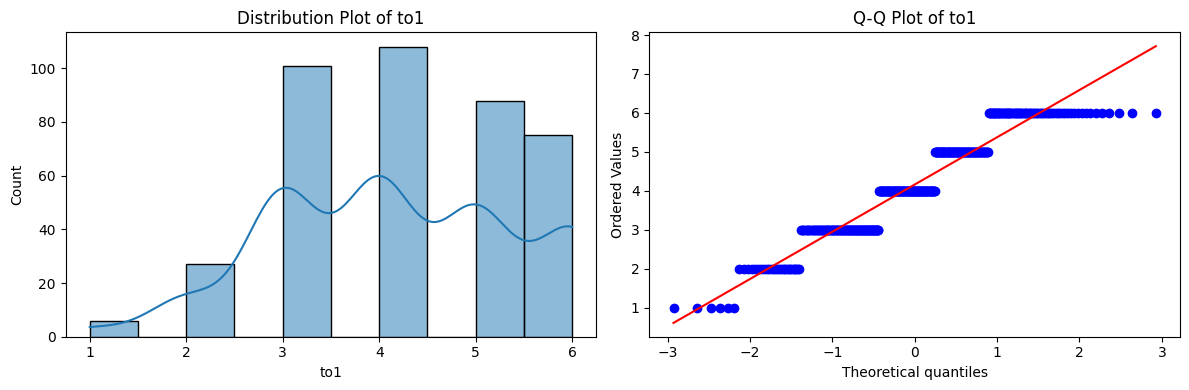

---------------------------------------- 

*** Normality Checks for: c5 ***

Descriptive Statistics:
count   405.00000
mean      3.96543
std       1.19975
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: c5, dtype: float64
Skewness: 0.00622576373245567
Kurtosis: -0.5603645640945305
Kolmogorov-Smirnov Test: Statistic=0.17221833625482336, p-value=5.6650975261486616e-11


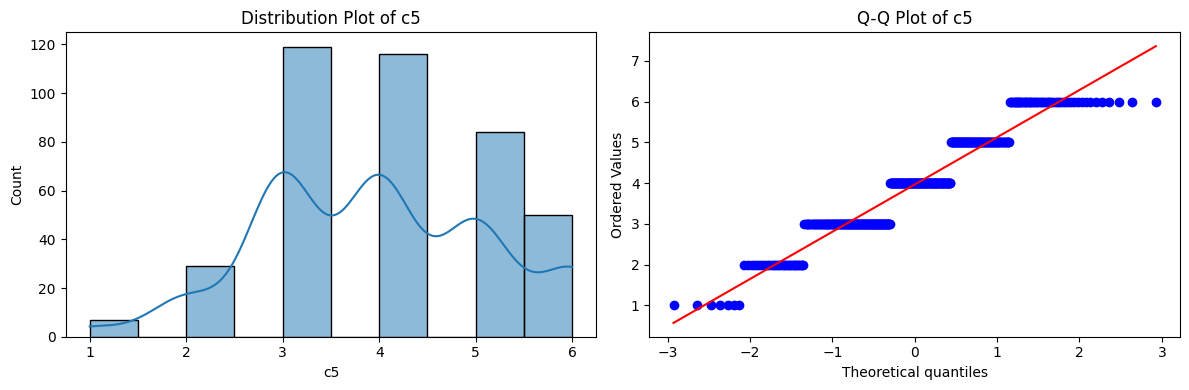

---------------------------------------- 

*** Normality Checks for: c6 ***

Descriptive Statistics:
count   405.00000
mean      3.99012
std       1.20227
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: c6, dtype: float64
Skewness: -0.03248892813648315
Kurtosis: -0.5035758619338027
Kolmogorov-Smirnov Test: Statistic=0.1652718206535751, p-value=3.8921835053359283e-10


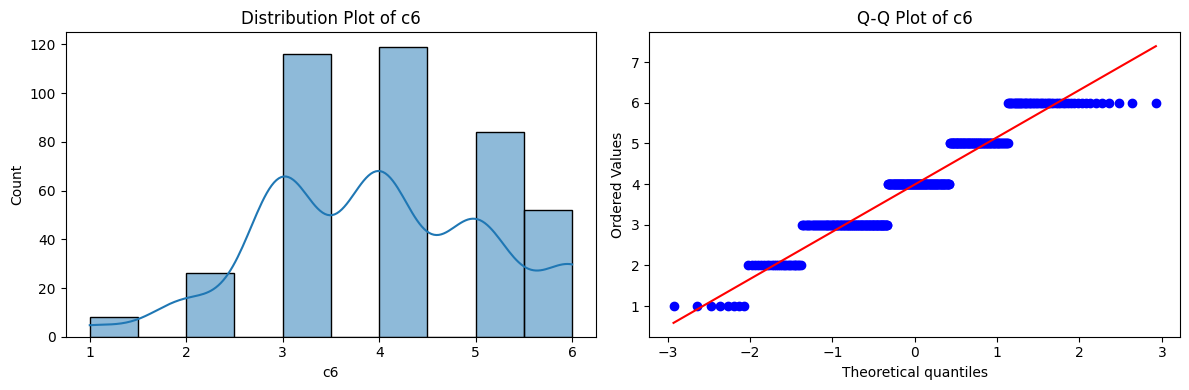

---------------------------------------- 

*** Normality Checks for: cx11 ***

Descriptive Statistics:
count   405.00000
mean      3.93827
std       1.22420
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: cx11, dtype: float64
Skewness: 0.0206320206183829
Kurtosis: -0.582896598812364
Kolmogorov-Smirnov Test: Statistic=0.17335420478152763, p-value=4.1019341110191694e-11


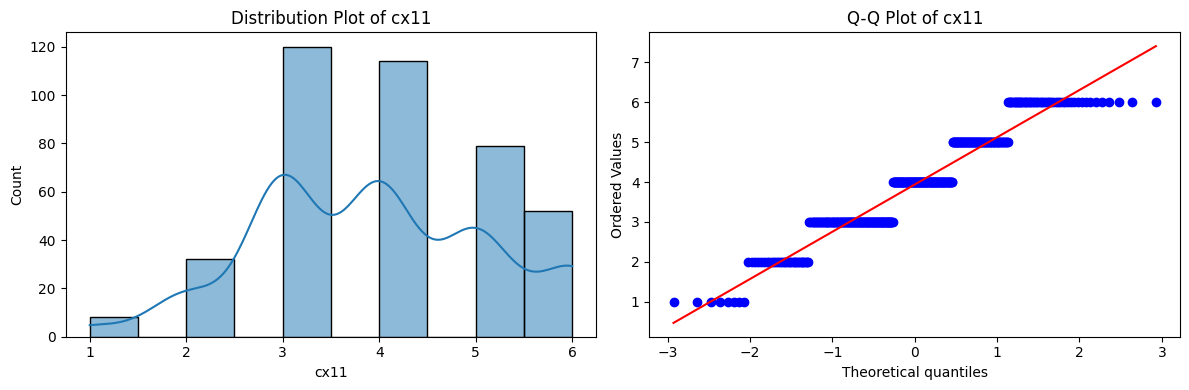

---------------------------------------- 

*** Normality Checks for: cx6 ***

Descriptive Statistics:
count   405.00000
mean      3.85926
std       1.31535
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: cx6, dtype: float64
Skewness: 0.07132571224256495
Kurtosis: -0.8062958964483062
Kolmogorov-Smirnov Test: Statistic=0.2024635412725475, p-value=4.960627804091724e-15


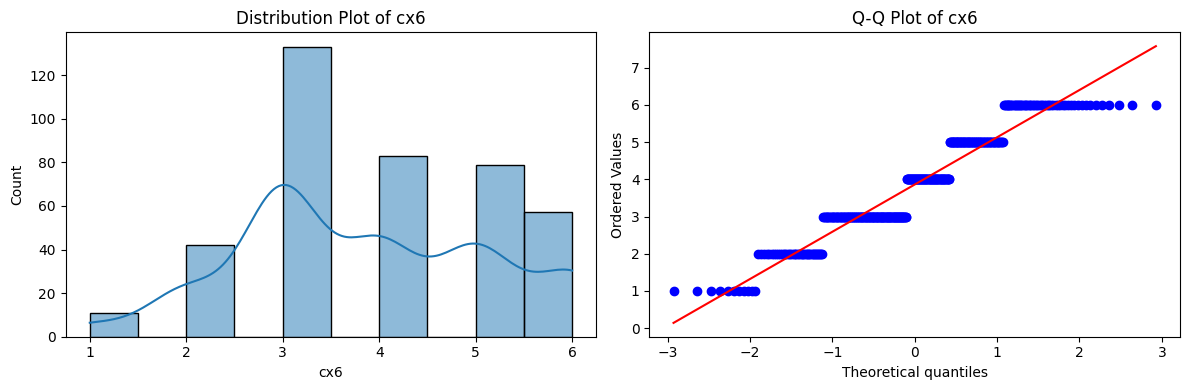

---------------------------------------- 

*** Normality Checks for: c9 ***

Descriptive Statistics:
count   405.00000
mean      3.95802
std       1.24905
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: c9, dtype: float64
Skewness: -0.01991481717750682
Kurtosis: -0.6342350154887568
Kolmogorov-Smirnov Test: Statistic=0.17352256987634845, p-value=3.9095270205311995e-11


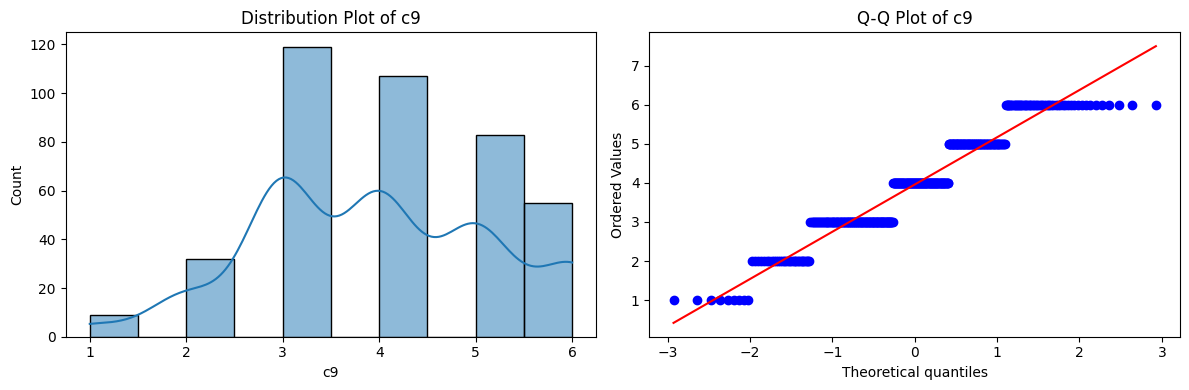

---------------------------------------- 

*** Normality Checks for: to2 ***

Descriptive Statistics:
count   405.00000
mean      4.04198
std       1.33710
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: to2, dtype: float64
Skewness: -0.17063942876103652
Kurtosis: -0.7313515196331313
Kolmogorov-Smirnov Test: Statistic=0.15740116878684046, p-value=3.133127506099722e-09


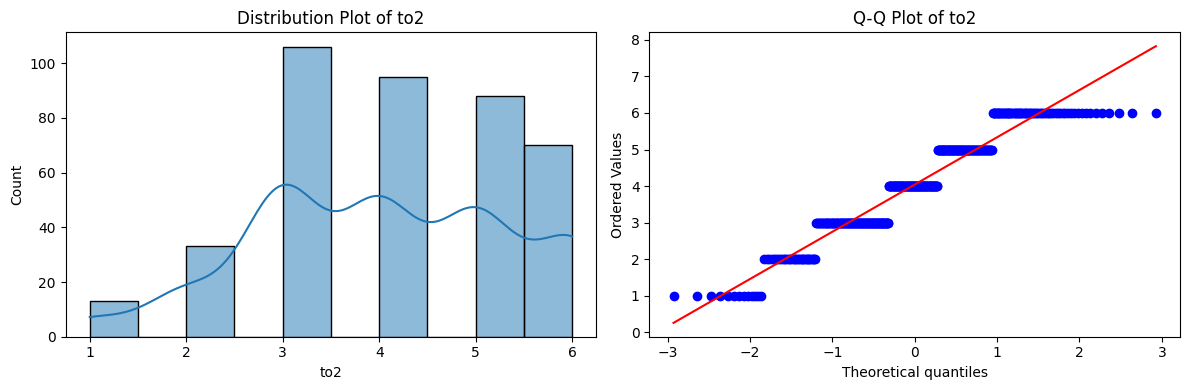

---------------------------------------- 

*** Normality Checks for: sp2 ***

Descriptive Statistics:
count   405.00000
mean      3.74321
std       1.45331
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: sp2, dtype: float64
Skewness: 0.079588292246944
Kurtosis: -0.9243352601791797
Kolmogorov-Smirnov Test: Statistic=0.1892884188383892, p-value=3.516372277693739e-13


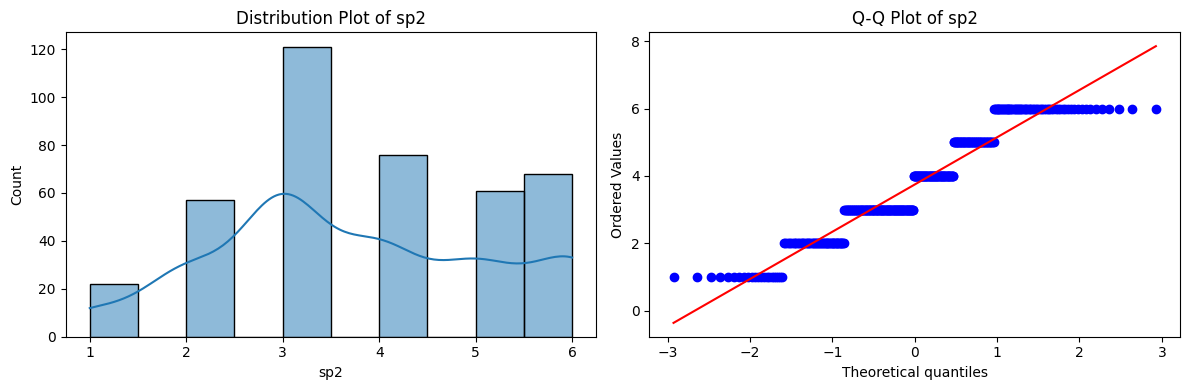

---------------------------------------- 

*** Normality Checks for: t2 ***

Descriptive Statistics:
count   405.00000
mean      2.74321
std       1.20979
min       1.00000
25%       2.00000
50%       3.00000
75%       3.00000
max       6.00000
Name: t2, dtype: float64
Skewness: 0.5709007606548241
Kurtosis: 0.026533068215325528
Kolmogorov-Smirnov Test: Statistic=0.19866830822343584, p-value=1.7450526270533622e-14


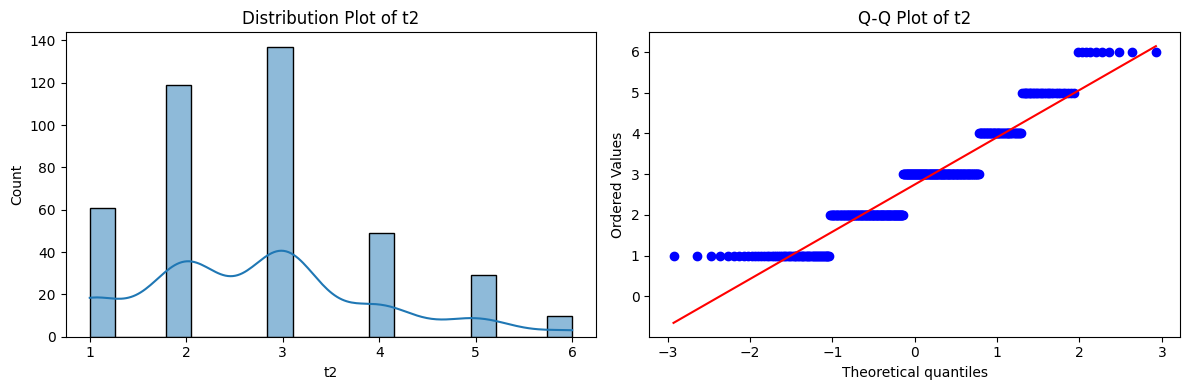

---------------------------------------- 

*** Normality Checks for: c10 ***

Descriptive Statistics:
count   405.00000
mean      3.39012
std       1.20062
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: c10, dtype: float64
Skewness: 0.2822540226981786
Kurtosis: -0.22176976644581847
Kolmogorov-Smirnov Test: Statistic=0.22738495156866878, p-value=6.936479238049294e-19


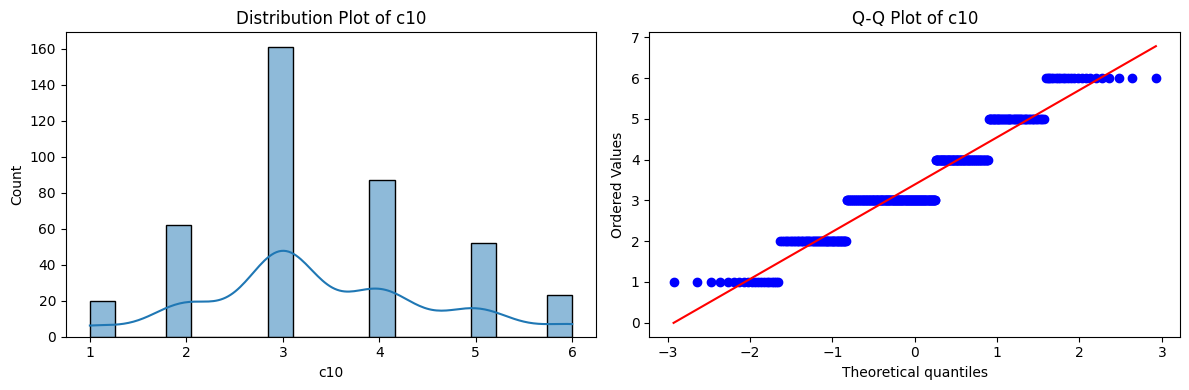

---------------------------------------- 

*** Normality Checks for: se2 ***

Descriptive Statistics:
count   405.00000
mean      3.26420
std       1.27886
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: se2, dtype: float64
Skewness: 0.4517577180565905
Kurtosis: -0.08358170784890051
Kolmogorov-Smirnov Test: Statistic=0.2534395024986881, p-value=2.040230231410188e-23


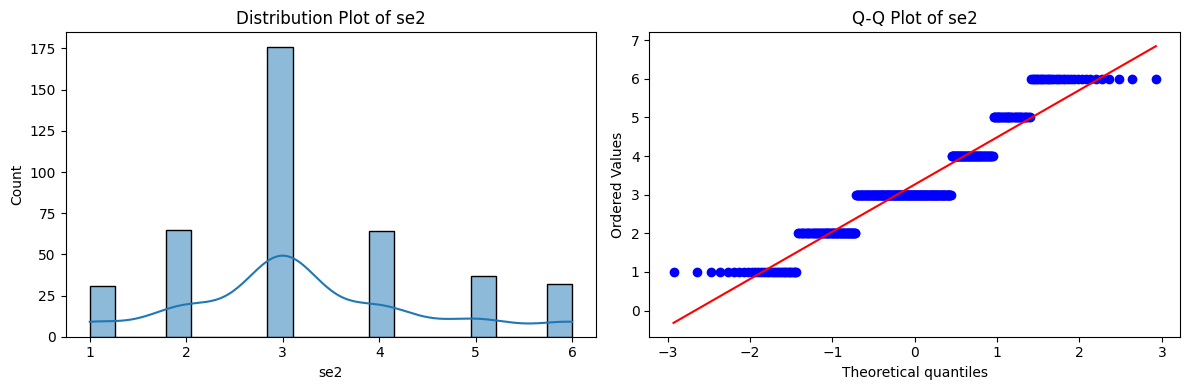

---------------------------------------- 

*** Normality Checks for: cx12 ***

Descriptive Statistics:
count   405.00000
mean      3.22222
std       1.44538
min       1.00000
25%       2.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: cx12, dtype: float64
Skewness: 0.3632086172292617
Kurtosis: -0.6640128050149521
Kolmogorov-Smirnov Test: Statistic=0.20553987329463008, p-value=1.7574342042186377e-15


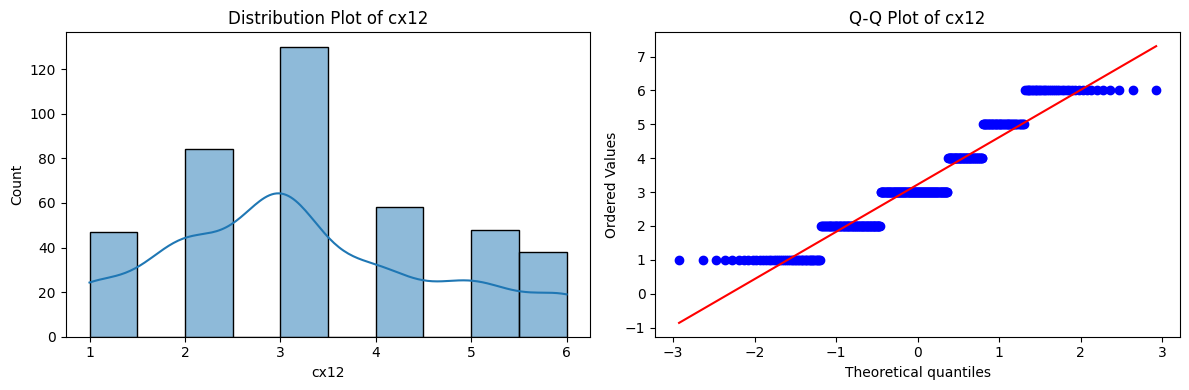

---------------------------------------- 

*** Normality Checks for: c11 ***

Descriptive Statistics:
count   405.00000
mean      3.50370
std       1.23405
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: c11, dtype: float64
Skewness: 0.23367357264626962
Kurtosis: -0.4619439513383643
Kolmogorov-Smirnov Test: Statistic=0.2164505643837596, p-value=3.886877698866082e-17


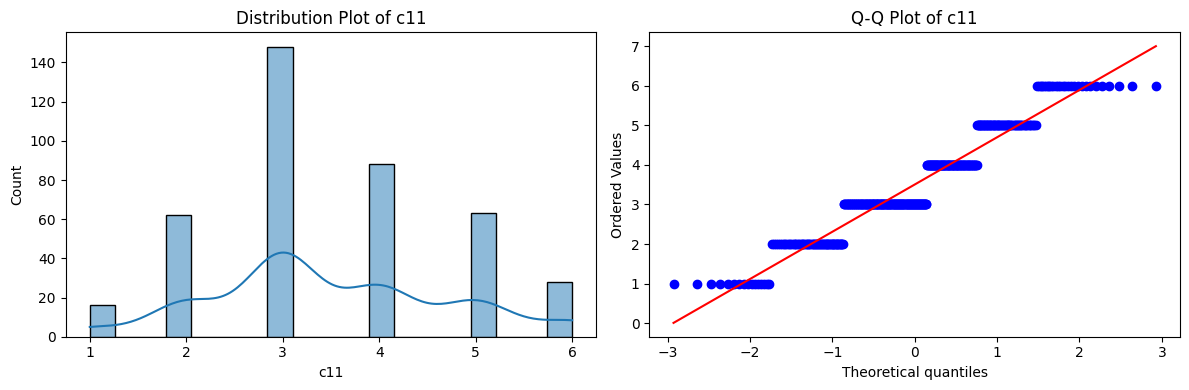

---------------------------------------- 

*** Normality Checks for: em4 ***

Descriptive Statistics:
count   405.00000
mean      3.34815
std       1.35697
min       1.00000
25%       2.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: em4, dtype: float64
Skewness: 0.28764756249267465
Kurtosis: -0.6219668309765884
Kolmogorov-Smirnov Test: Statistic=0.20124198071857363, p-value=7.45644526265059e-15


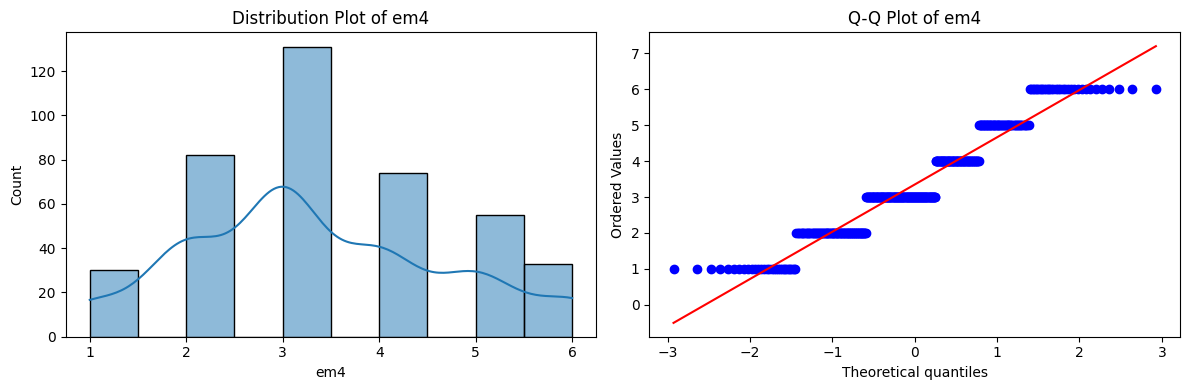

---------------------------------------- 

*** Normality Checks for: em9 ***

Descriptive Statistics:
count   405.00000
mean      3.08148
std       1.32597
min       1.00000
25%       2.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: em9, dtype: float64
Skewness: 0.3618750764747352
Kurtosis: -0.4882643779877034
Kolmogorov-Smirnov Test: Statistic=0.1911664420107898, p-value=1.9505903795746057e-13


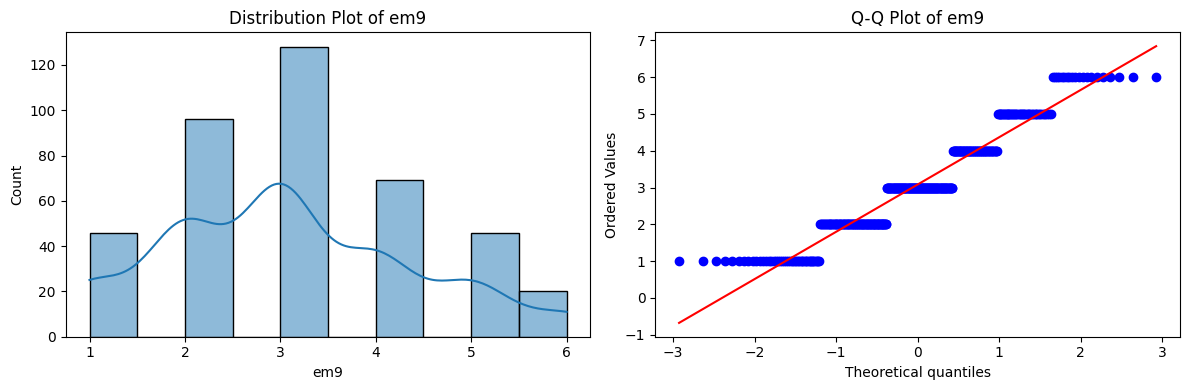

---------------------------------------- 

*** Normality Checks for: em7 ***

Descriptive Statistics:
count   405.00000
mean      3.32840
std       1.28522
min       1.00000
25%       2.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: em7, dtype: float64
Skewness: 0.2615583006219201
Kurtosis: -0.5756262675050876
Kolmogorov-Smirnov Test: Statistic=0.20083793453818055, p-value=8.527682048610299e-15


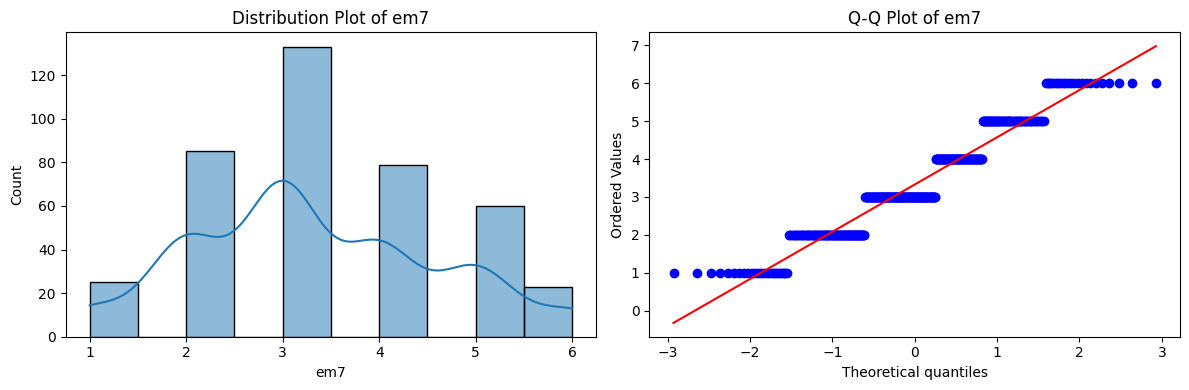

---------------------------------------- 

*** Normality Checks for: to7 ***

Descriptive Statistics:
count   405.00000
mean      3.56296
std       1.12537
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       6.00000
Name: to7, dtype: float64
Skewness: 0.28210457397636124
Kurtosis: -0.17407050594151352
Kolmogorov-Smirnov Test: Statistic=0.21747610511963, p-value=2.6880208533877902e-17


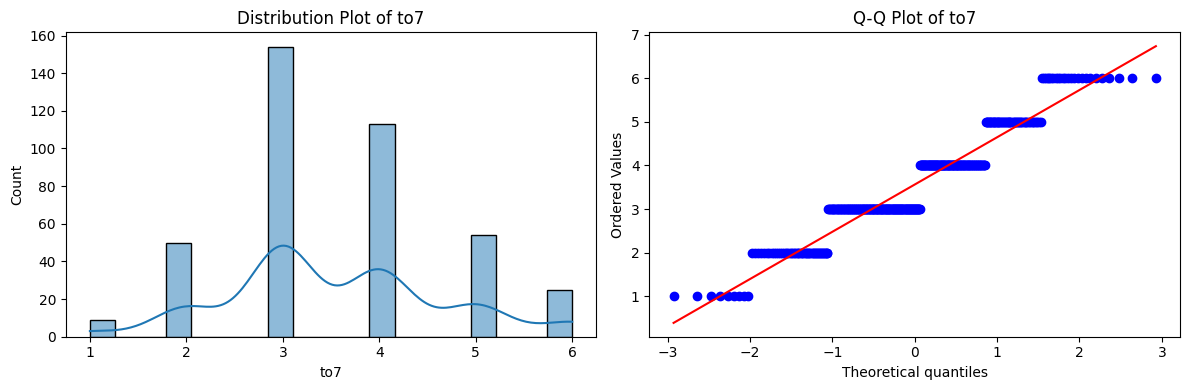

---------------------------------------- 

*** Normality Checks for: ex2 ***

Descriptive Statistics:
count   405.00000
mean      3.67407
std       1.22371
min       1.00000
25%       3.00000
50%       4.00000
75%       5.00000
max       6.00000
Name: ex2, dtype: float64
Skewness: 0.12156978679504803
Kurtosis: -0.4516680352357416
Kolmogorov-Smirnov Test: Statistic=0.19308029570105412, p-value=1.0633396864293742e-13


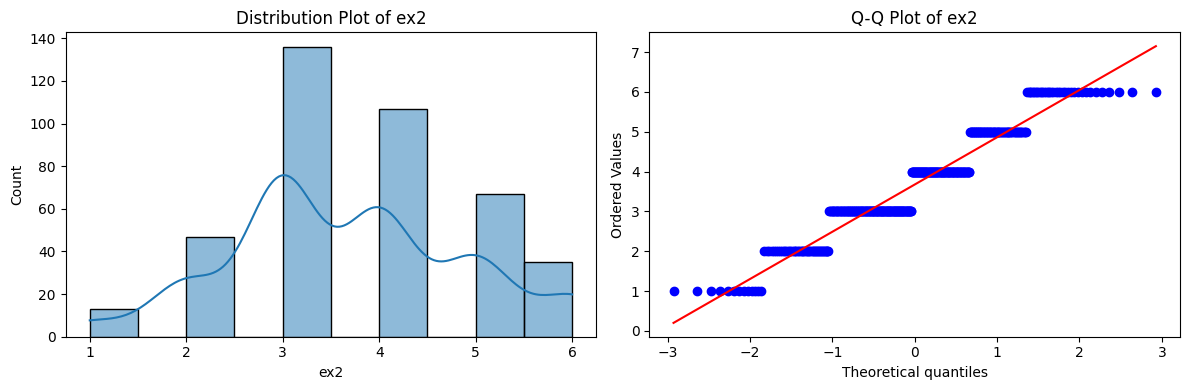

---------------------------------------- 



In [9]:
# Look at normality

vizer.check_normality(df_reduced_2)

Test removing suggested items

In [10]:
reduced_items_3 = [
    "cx9",
    "sp4",
    "ae3",
    "sp5",
    "cx10",
    "em1",
    "ex8",
    "ae6",
    "to1",
    "c5",
    "c6",
    "cx11",
    "cx6",
    "c9",
    # "to2", # removed item
    "sp2",
    "t2",
    "c10",
    "se2",
    "ex6",
    # "cx12", # John said CS12, but I assume he means this one
    "ex2",
    "em4",
    "em9",
    "em7",
    "em6",
]

df_reduced_3 = df_raw[reduced_items_3]

Low loadings: 
['se2']


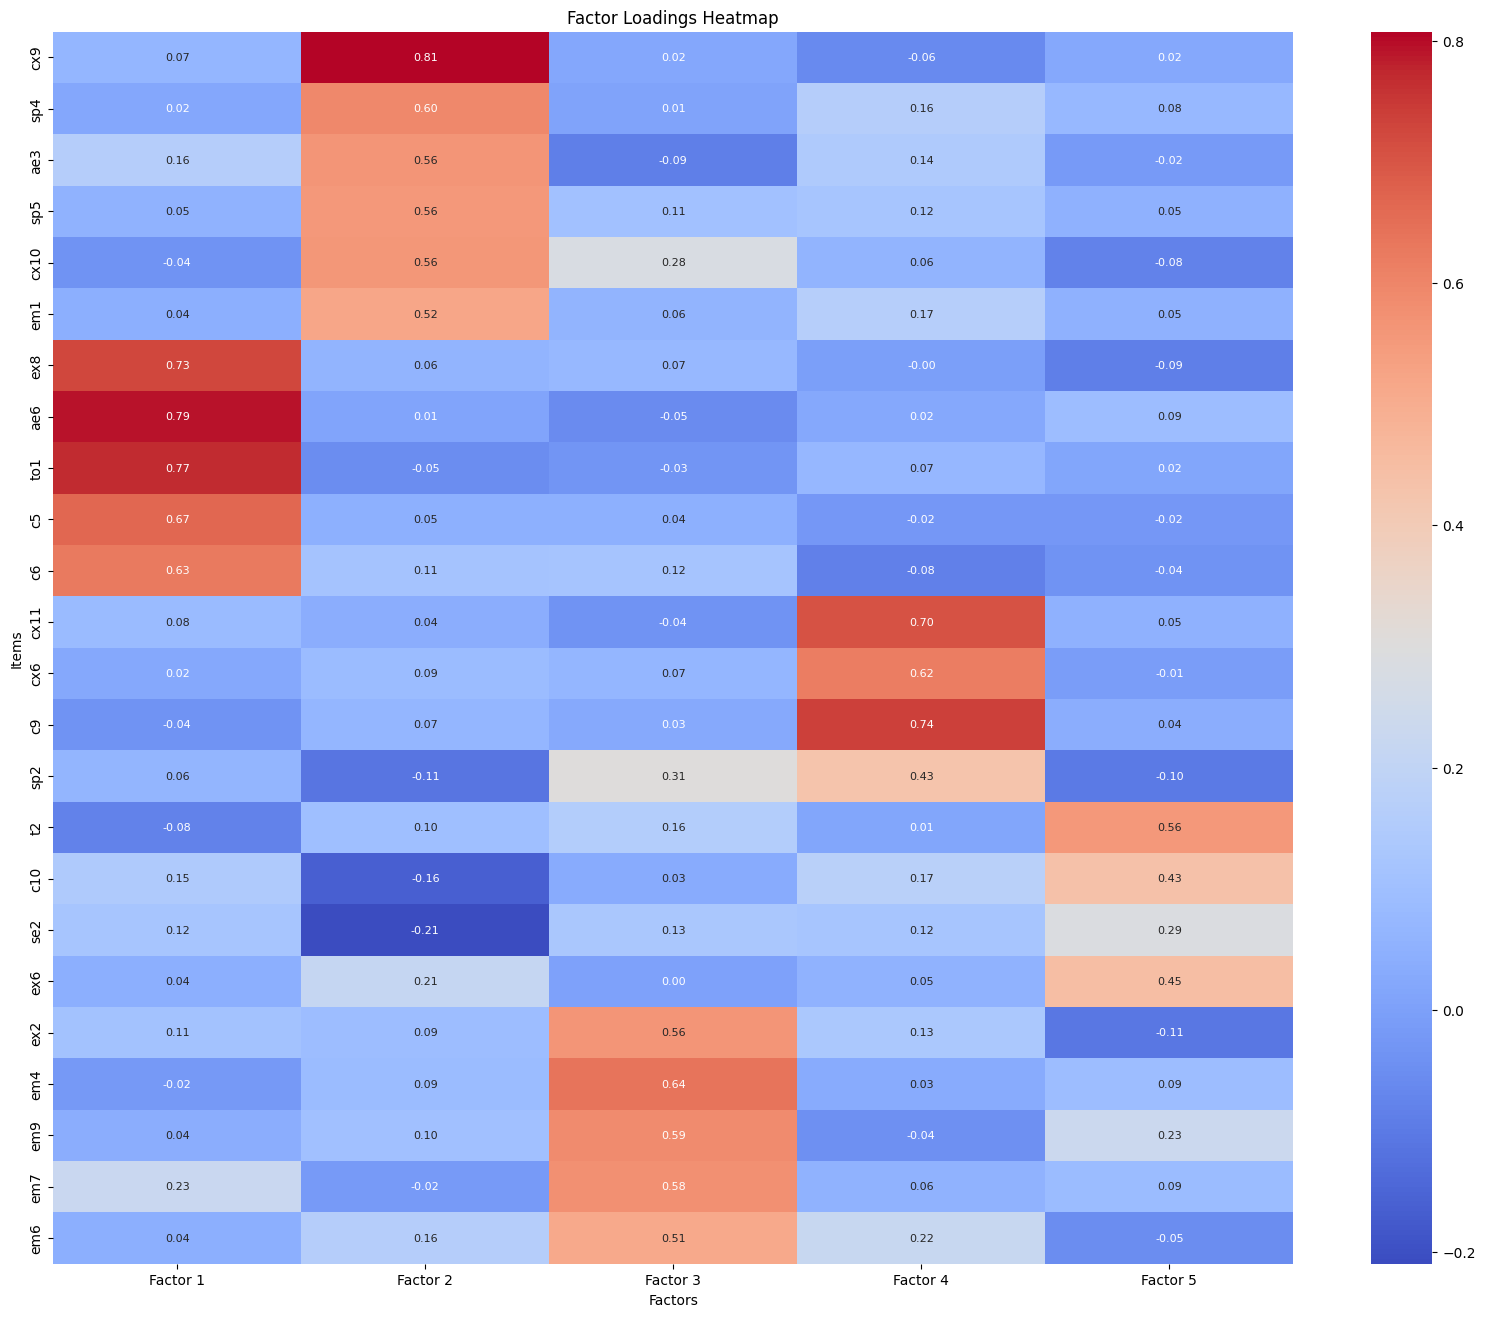

In [11]:
# Run the EFA
efa_5_reduced_v3 = modeler.efa(df=df_reduced_3, n_factors=5)
efa_5_reduced_v3_low_loadings = modeler.get_items_with_low_loadings(
    efa_5_reduced_v3.loadings_, df_reduced_3.columns, threshold=0.4
)
print("Low loadings: ")
print(efa_5_reduced_v3_low_loadings)

# heatmap
vizer.plot_loadings_heatmap(
    loadings=efa_5_reduced_v3.loadings_,
    item_names=df_reduced_3.columns,
    factor_names=[f"Factor {i + 1}" for i in range(efa_5_reduced_v3.n_factors)],
)

In [12]:
# Show the full question and what factor it loads on
df_strongest_loadings = modeler.strongest_loadings(
    efa_5_reduced_v3.loadings_, df_reduced_3.columns
)

# add in the question text
df_question_txt = pd.read_excel(data_loc / "ets_question_text_map.xlsx")
df_strongest_loadings = pd.merge(
    df_strongest_loadings, df_question_txt, on="item", how="left"
)
df_strongest_loadings

,item,strongest_factor,loading,item_text
0,ae6,1,0.79343,I feel overwhelming compassion for others.
1,to1,1,0.76778,Compassion for others is a priority.
2,ex8,1,0.72606,My heart opens to include others.
3,c5,1,0.66745,My thoughts easily move to how I can help others.
4,c6,1,0.62687,My thinking expands to include other people.
5,cx9,2,0.80729,I feel a sense of belonging.
6,sp4,2,0.59529,I feel a profound sense of belonging.
7,ae3,2,0.56215,I have the feeling of being cared for.
8,cx10,2,0.55843,I feel fully aligned with life.
9,sp5,2,0.55653,I feel a profound sense of joy.
